## 1. [Simple Two Hidden Layer Deep Learning]

[instructions]
1) Preprocess the MNIST dataset and split it into training and testing sets.
import sklearn
import tensorflow as tf
(X_train_full, y_train_full), (X_test, y_test) =
tf.keras.datasets.mnist.load_data()
2) Scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by
255.
3) Implement a two hidden layer neural network using the loss function of
loss="sparse_categorical_crossentropy"
4) Train the model on the training data.
5) Evaluate the model's performance on the testing data.
6) Analyze and discuss the results, including accuracy, confusion matrix, and any observed
limitations.
7) Make sure to experiment with different epochs, hyperparameters, such as the number of
hidden units, learning rates, optimizers (SGD, Momentum, RMSProp, Adam, etc), and non-
linear activation functions (such as ReLU, Sigmoid, Tanh).
activation="relu", activation="sigmoid", or activation="tanh"

In [1]:
from packaging import version
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [15]:
# import MNIST dataset

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

### 데이터셋 정보 확인
어떤 데이터셋인지 모르므로 면밀히 살펴봄

In [16]:
print(f"X_train_full shape: {X_train_full.shape}")
print(f"y_train_full shape: {y_train_full.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"X_train_full dtype: {X_train_full.dtype}")
print(f"y_train_full dtype: {y_train_full.dtype}")
print(f"X_test dtype: {X_test.dtype}")
print(f"y_test dtype: {y_test.dtype}")

print(f"X_train_full min: {X_train_full.min()}, max: {X_train_full.max()}")
print(f"X_test min: {X_test.min()}, max: {X_test.max()}")

X_train_full shape: (60000, 28, 28)
y_train_full shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train_full dtype: uint8
y_train_full dtype: uint8
X_test dtype: uint8
y_test dtype: uint8
X_train_full min: 0, max: 255
X_test min: 0, max: 255


In [17]:
print(f"labels in training set: {sorted(set(y_train_full))}")

labels in training set: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### scaling
- max_size = 255이므로 정규화

In [18]:
X_train_full, X_test = X_train_full / 255, X_test / 255

In [19]:
# ref: # https://snowdeer.github.io/machine-learning/2018/01/09/recognize-mnist-data/
# 0~9까지의 숫자 손글씨 데이터셋
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

### build model

In [22]:
tf.random.set_seed(42)

In [24]:
model = tf.keras.Sequential([
        # 입력 레이어: flatten
        tf.keras.layers.Flatten(input_shape=[28, 28]), # MNIST는 28*28이미지. dense층은 벡터입력만 받으므로 flatten은 (28,28)을 784차원 벡터로 펼침.
        # hidden layer:
        #   2개
        #   (neuron 개수가 제시되지 않아 기본으로) 각 100개 neurons
        #   activation function은 ReLU
        tf.keras.layers.Dense(100, activation="relu", 
                                kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu", 
                                kernel_initializer="he_normal"),
        # output layer: 10개의 클래스, softmax는 확률 분포를 만들기 때문에 멀티클래스 분류에 사용
        tf.keras.layers.Dense(10, activation="softmax")
    ]
)

In [25]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=["accuracy"]
)

### 훈련

In [26]:
# 기본 epochs=5
history_relu = model.fit(X_train_full, y_train_full, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step - accuracy: 0.5309 - loss: 1.7277
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.8108 - loss: 0.8441
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.8559 - loss: 0.5757
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - accuracy: 0.8748 - loss: 0.4733
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 833us/step - accuracy: 0.8859 - loss: 0.4184


### evaluate

In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

In [29]:
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Test Loss: 0.3780
Test Accuracy: 0.8952 (89.52%)


In [30]:
import numpy as np

y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


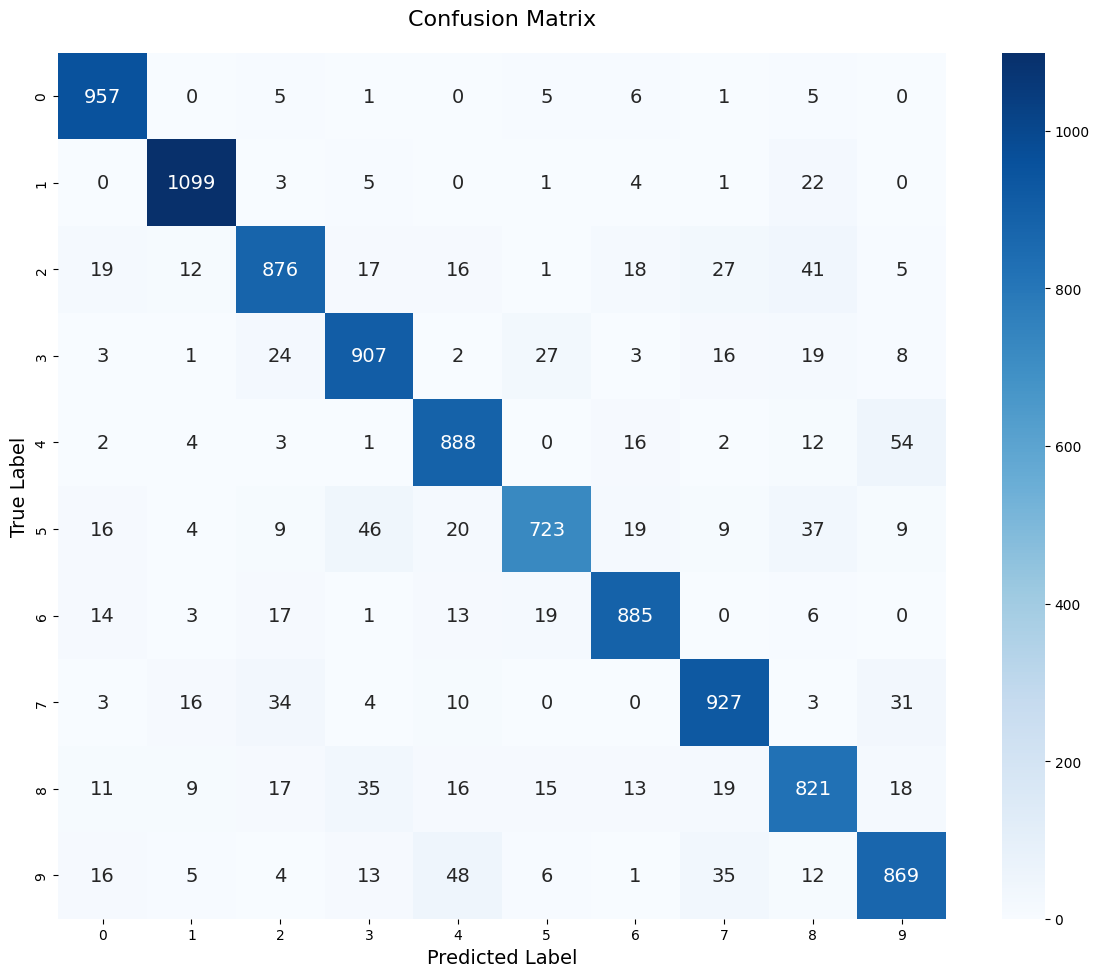

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=16, pad=20)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.tight_layout()
plt.show()

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.95      0.97      0.96      1135
           2       0.88      0.85      0.87      1032
           3       0.88      0.90      0.89      1010
           4       0.88      0.90      0.89       982
           5       0.91      0.81      0.86       892
           6       0.92      0.92      0.92       958
           7       0.89      0.90      0.90      1028
           8       0.84      0.84      0.84       974
           9       0.87      0.86      0.87      1009

    accuracy                           0.90     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.90      0.90      0.89     10000



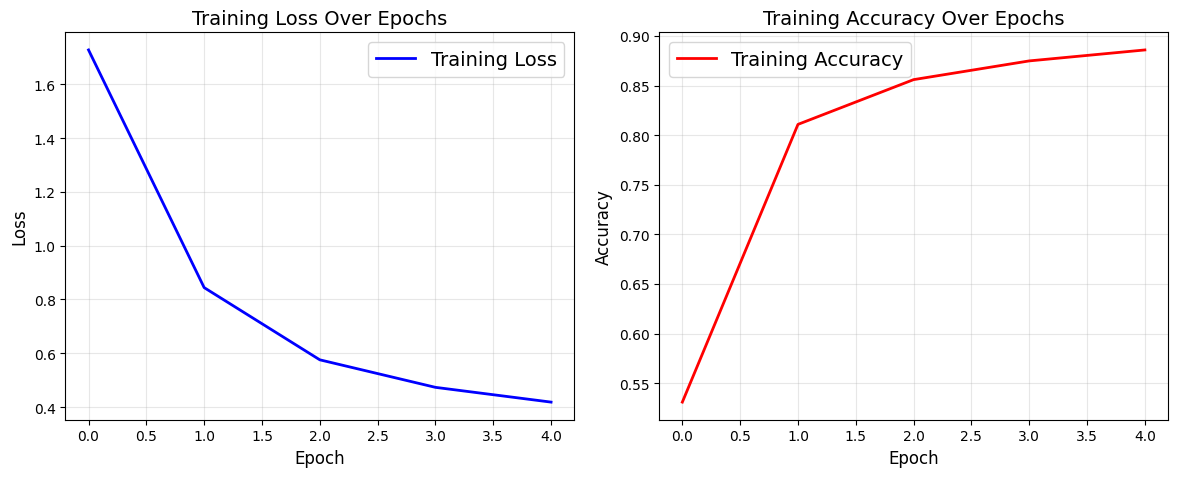

In [36]:
# 5. Plot Training History (Loss and Accuracy)
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_relu.history['loss'], 'b-', label='Training Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Over Epochs', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history_relu.history['accuracy'], 'r-', label='Training Accuracy', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training Accuracy Over Epochs', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- evaluation 결과는 다음과 같다
```
Test Loss: 0.3780
Test Accuracy: 0.8952 (89.52%)
```
- confusion matrix을 통해 prediction 결과를 살펴보면 본인의 answer class로 잘 분류되어 diagonal 분포를 보이고 있음을 확인할 수 있다.
- observed limitations
    - loss가 0.3, accuracy가 0.9 정도로 매우 좋은 성능을 보이고 있다. 개선해야 될 사항은 보이지 않는다.
    - 다만 현재는 hidden layer 2개와 epoch = 5로 매우 간단한 구조이며, 은닉층이 100개로 증가하거나 epoch 수가 많아져 구조가 복잡해질 경우 충분히 한계를 보일 수 있다.
    - 따라서 아래의 하이퍼 파라미터 튜닝 단계에서 여러 파라미터로 testing 해보며 어떤 모델이 가장 fit하는 지 탐색해보려고 한다.

### hyperparameter tuning
- with different
    - epochs
    - learning rate
    - activation_functions (ReLU, Sigmoid, Tanh)
    - optimizers (SGD, Momentum, RMSProp, Adam, etc)

In [ ]:
# 여러 비교 과정에서 재사용될 메소드 정의

def build_and_train_model(
    activation="relu",
    optimizer="SGD",
    learning_rate=0.001,
    epochs=5,
    X_train=X_train_full,
    y_train=y_train_full,
    verbose=0
):
    tf.random.set_seed(42)
    
    # 활성화 함수에 따른 kernel_initializer 선택
    if activation == "relu":
        kernel_init = "he_normal"
    else:
        kernel_init = "glorot_uniform"
    
    # 모델 빌드
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation=activation, 
                             kernel_initializer=kernel_init),
        tf.keras.layers.Dense(100, activation=activation, 
                             kernel_initializer=kernel_init),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    
    # 옵티마이저 선택
    if optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "Momentum":
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    elif optimizer == "RMSProp":
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    # 모델 컴파일
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=opt,
        metrics=["accuracy"]
    )
    
    # 훈련
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        verbose=verbose
    )
    
    return model, history

1. epoch

In [39]:
def compare_epochs(epochs_list=[5, 10, 20, 30], learning_rate=0.001):
    results = {}
    
    
    for epochs in epochs_list:
        print(f"\nepochs={epochs}")
        model, history = build_and_train_model(
            activation="relu",
            optimizer="SGD",
            learning_rate=learning_rate,
            epochs=epochs,
            verbose=1
        )
        
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        results[epochs] = {
            'history': history,
            'test_loss': test_loss,
            'test_accuracy': test_acc
        }
        print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")
    
    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Accuracy plot
    for epochs in epochs_list:
        history = results[epochs]['history']
        axes[0].plot(history.history['accuracy'], 
                    label=f'Epochs={epochs} (Final: {results[epochs]["test_accuracy"]:.4f})',
                    marker='o')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Training Accuracy')
    axes[0].set_title('Training Accuracy by Epochs')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Loss plot
    for epochs in epochs_list:
        history = results[epochs]['history']
        axes[1].plot(history.history['loss'], 
                    label=f'Epochs={epochs} (Final Test Loss: {results[epochs]["test_loss"]:.4f})',
                    marker='o')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Training Loss')
    axes[1].set_title('Training Loss by Epochs')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return results


epochs=5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - accuracy: 0.5399 - loss: 1.6718
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.8120 - loss: 0.8121
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.8593 - loss: 0.5552
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 979us/step - accuracy: 0.8789 - loss: 0.4578
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8897 - loss: 0.4073
Test Accuracy: 0.8991, Test Loss: 0.3691

epochs=10
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5766 - loss: 1.5837
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.8171 - loss: 0.7758
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.8564 - loss: 0.5526
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 946us/step - accuracy: 0.8744 - loss: 0.4632
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8861 - loss: 0.4147
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc

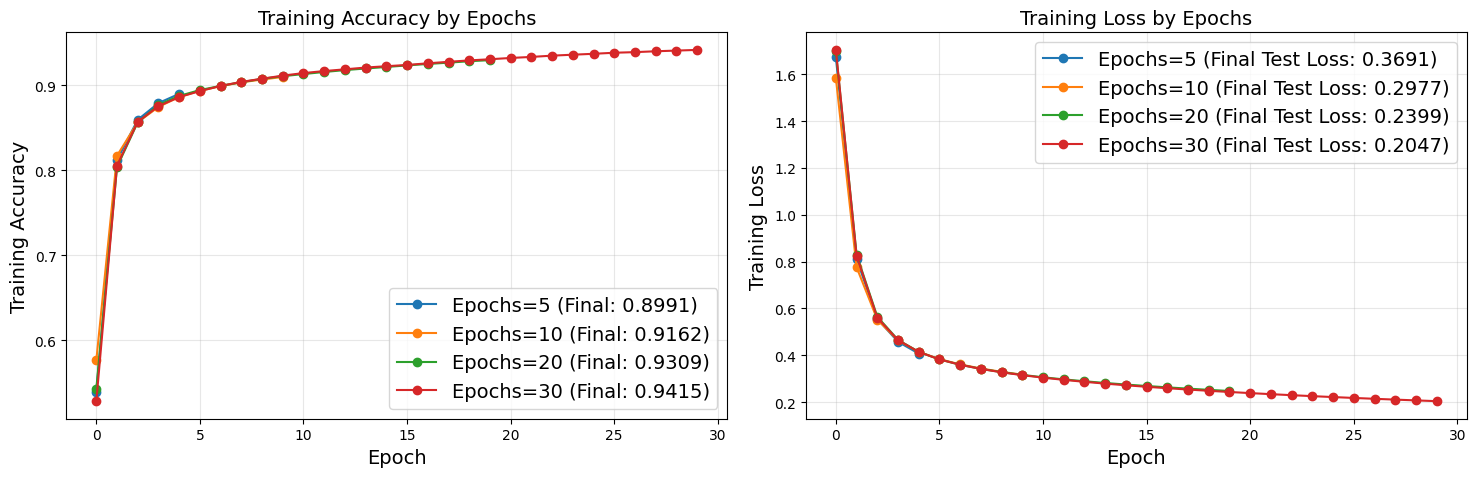

In [40]:
epoch_results = compare_epochs(epochs_list=[5, 10, 20, 30], learning_rate=0.001)

epoch 수가 증가할 수록 accuracy가 증가하지만 slope가 낮아졌으며 과한 overfitting이 발생할 수 있다.

2. learning rate

In [41]:
def compare_learning_rates(lr_list=[0.0001, 0.001, 0.01, 0.1], epochs=10):
    results = {}
    
    for lr in lr_list:
        print(f"\nlearning_rate={lr}")
        try:
            model, history = build_and_train_model(
                activation="relu",
                optimizer="SGD",
                learning_rate=lr,
                epochs=epochs,
                verbose=1
            )
            
            test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
            results[lr] = {
                'history': history,
                'test_loss': test_loss,
                'test_accuracy': test_acc,
                'success': True
            }
            print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")
        except Exception as e:
            print(f"Error with lr={lr}: {str(e)}")
            results[lr] = {'success': False}
    
    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Accuracy plot
    for lr in lr_list:
        if lr in results and results[lr].get('success', False):
            history = results[lr]['history']
            axes[0].plot(history.history['accuracy'], 
                        label=f'LR={lr} (Final: {results[lr]["test_accuracy"]:.4f})',
                        marker='o')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Training Accuracy')
    axes[0].set_title('Training Accuracy by Learning Rate')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Loss plot
    for lr in lr_list:
        if lr in results and results[lr].get('success', False):
            history = results[lr]['history']
            axes[1].plot(history.history['loss'], 
                        label=f'LR={lr} (Final Test Loss: {results[lr]["test_loss"]:.4f})',
                        marker='o')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Training Loss')
    axes[1].set_title('Training Loss by Learning Rate')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return results


learning_rate=0.0001


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step - accuracy: 0.1778 - loss: 2.2893
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - accuracy: 0.2886 - loss: 2.1450
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0.3966 - loss: 2.0221
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.4839 - loss: 1.8980
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5577 - loss: 1.7697
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - accuracy: 0.6177 - loss: 1.6387
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.6654 - loss: 1.5087
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7031 - loss: 1.3845
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7322 - loss: 1.2704
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - accuracy: 0.7545 - loss: 1.1685
Test Accuracy: 0.7734, Test Loss: 1.1016

learning_rate=0.001
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2

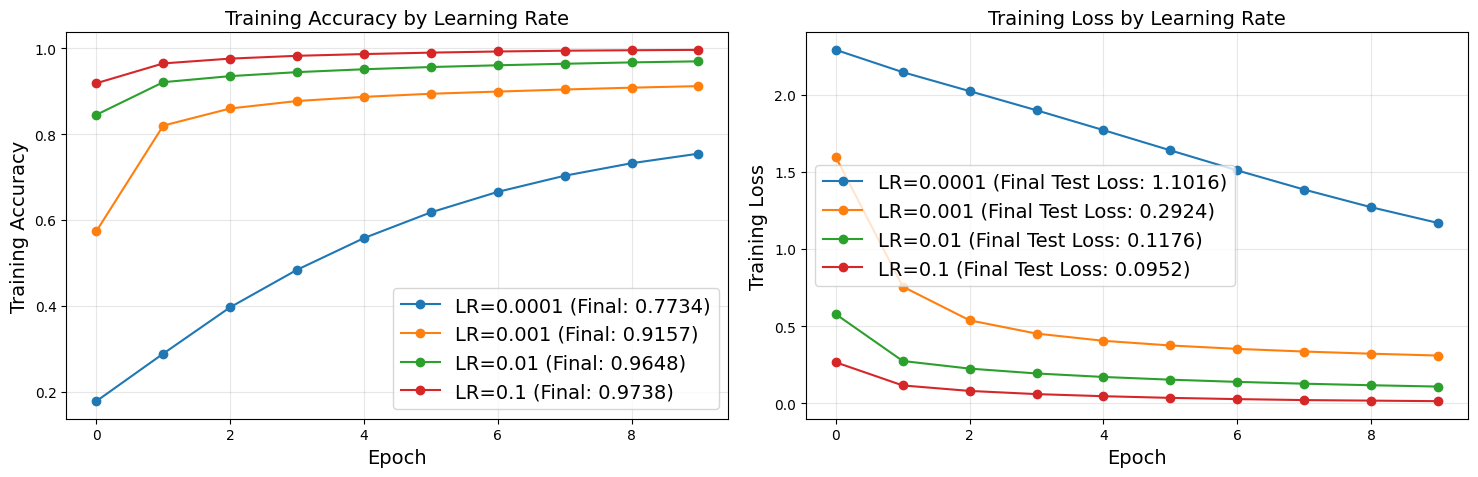

In [42]:
lr_results = compare_learning_rates(lr_list=[0.0001, 0.001, 0.01, 0.1], epochs=10)

learning rate가 너무 낮으면 accuarcy가 낮고 loss도 큼을 확인할 수 있다. <br />
learning rate = 0.1에서 가장 좋은 성능을 보임을 확인할 수 있다.

3. activation function

In [ ]:
def compare_activations(activation_list=["relu", "sigmoid", "tanh"], 
                       epochs=10, learning_rate=0.001):
    results = {}
    
    for activation in activation_list:
        print(f"\nactivation={activation}")
        model, history = build_and_train_model(
            activation=activation,
            optimizer="SGD",
            learning_rate=learning_rate,
            epochs=epochs,
            verbose=1
        )
        
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        results[activation] = {
            'history': history,
            'test_loss': test_loss,
            'test_accuracy': test_acc
        }
        print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")
    
    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Accuracy plot
    for activation in activation_list:
        history = results[activation]['history']
        axes[0].plot(history.history['accuracy'], 
                    label=f'{activation.upper()} (Final: {results[activation]["test_accuracy"]:.4f})',
                    marker='o')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Training Accuracy')
    axes[0].set_title('Training Accuracy by Activation Function')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Loss plot
    for activation in activation_list:
        history = results[activation]['history']
        axes[1].plot(history.history['loss'], 
                    label=f'{activation.upper()} (Final Test Loss: {results[activation]["test_loss"]:.4f})',
                    marker='o')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Training Loss')
    axes[1].set_title('Training Loss by Activation Function')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return results


activation=relu
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 887us/step - accuracy: 0.5707 - loss: 1.6206
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.8181 - loss: 0.7877
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 866us/step - accuracy: 0.8619 - loss: 0.5508
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8800 - loss: 0.4566
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.8900 - loss: 0.4068
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - accuracy: 0.8965 - loss: 0.3754
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 957us/step - accuracy: 0.9018 - loss: 0.3530
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9057 - loss: 0.3359
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9093 - loss: 0.3221
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9123 - loss: 0.3105
Test Accuracy: 0.9167, Test Loss: 0.2916

activation=sigmoid
Epoch 1/10
1875/1875 ━━━━━━━━

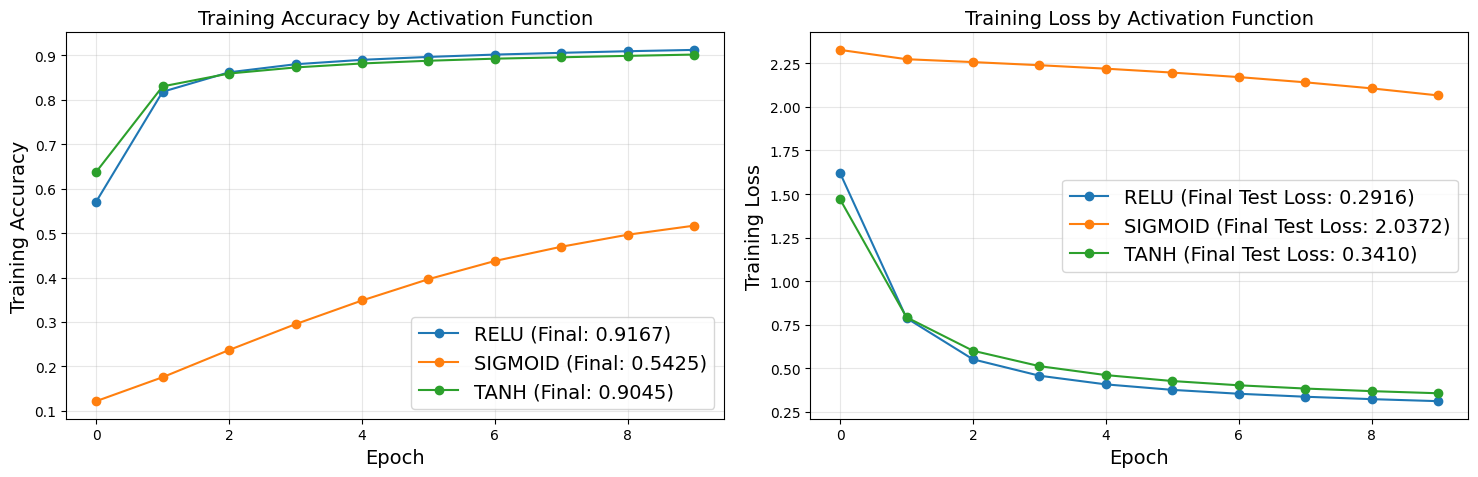

In [45]:
activation_results = compare_activations(activation_list=["relu", "sigmoid", "tanh"], 
                                        epochs=10, learning_rate=0.001)

relu와 tanh의 activation function은 유사한 성능을 보이는 반면 sigmoid의 경우 가장 부진한 성능을 보이고 있다.

- sigmoid가 가장 좋지 않은 성능을 보이는 이유 
    - sigmoid 함수의 출력 범위는 (0, 1). 미분 값의 최댓값이 0.25
    - 2개 hidden layer를 거치면서 backpropagation에서 gradient가 계속 곱해지는 데 0.25보다 작은 값들이 반복적으로 곱해지면서 gradient가 작아짐 
        - **`gradient vanishing 문제 발생`**
    - gradient가 제대로 전달되지 않아 학습이 이루어지지 않음

4. optimizer

In [48]:
def compare_optimizers(optimizer_list=["SGD", "Momentum", "RMSProp", "Adam"],
                      epochs=10, learning_rate=0.001):
    results = {}
    
    for optimizer in optimizer_list:
        print(f"\n훈련 중: optimizer={optimizer}")
        model, history = build_and_train_model(
            activation="relu",
            optimizer=optimizer,
            learning_rate=learning_rate,
            epochs=epochs,
            verbose=1
        )
        
        # 테스트 성능 평가
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        results[optimizer] = {
            'history': history,
            'test_loss': test_loss,
            'test_accuracy': test_acc
        }
        print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")
    
    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Accuracy plot
    for optimizer in optimizer_list:
        history = results[optimizer]['history']
        axes[0].plot(history.history['accuracy'], 
                    label=f'{optimizer} (Final: {results[optimizer]["test_accuracy"]:.4f})',
                    marker='o')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Training Accuracy')
    axes[0].set_title('Training Accuracy by Optimizer')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Loss plot
    for optimizer in optimizer_list:
        history = results[optimizer]['history']
        axes[1].plot(history.history['loss'], 
                    label=f'{optimizer} (Final Test Loss: {results[optimizer]["test_loss"]:.4f})',
                    marker='o')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Training Loss')
    axes[1].set_title('Training Loss by Optimizer')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return results


훈련 중: optimizer=SGD
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.5293 - loss: 1.7211
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.8049 - loss: 0.8150
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.8538 - loss: 0.5585
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.8729 - loss: 0.4635
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.8846 - loss: 0.4127
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.8931 - loss: 0.3799
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8988 - loss: 0.3564
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9035 - loss: 0.3382
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9071 - loss: 0.3235
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9103 - loss: 0.3111
Test Accuracy: 0.9169, Test Loss: 0.2930

훈련 중: optimizer=Momentum
Epoch 1/10
1875/187

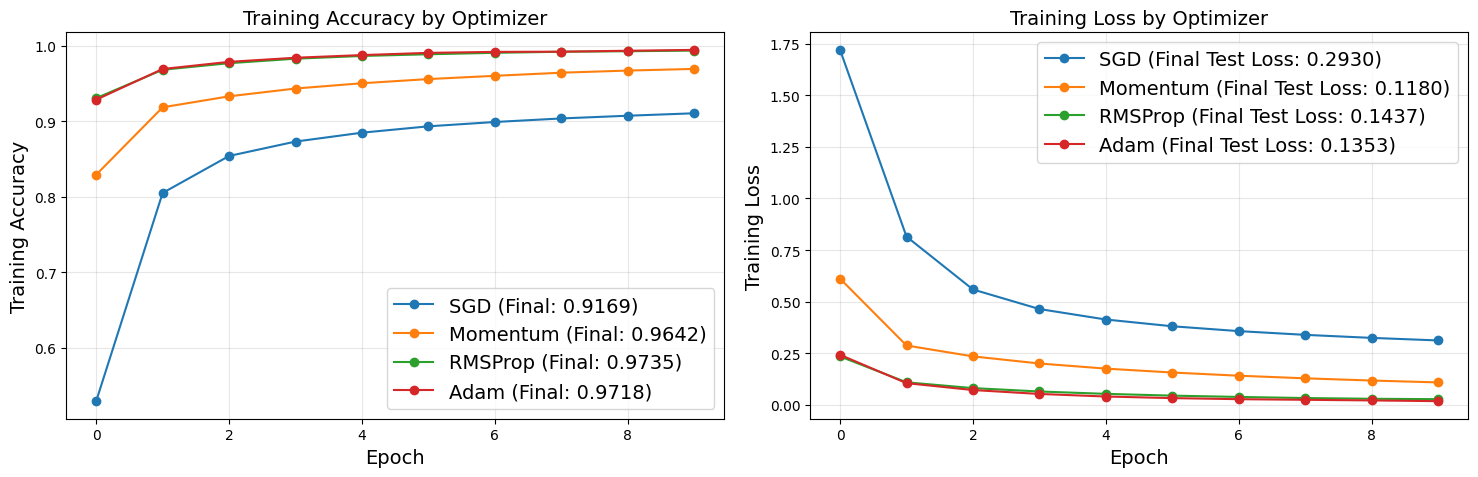

In [49]:
optimizer_results = compare_optimizers(optimizer_list=["SGD", "Momentum", "RMSProp", "Adam"],
                                        epochs=10, learning_rate=0.001)

- 기본 sgd에 반해 rmsprop, adam, momentum 순으로 가장 좋은 성능을 보이고 있음을 확인할 수 있다.
- RMSProp과 Adam은 성능이 유사하지만 Adam은 RMSProp에 momentum까지 결합한 방식이라 일반적으로 더 빠르고 안정적으로 수렴하기 때문에 가장 적절한 optimizer로 판단된다.